In [2]:
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
from google.cloud import bigquery
pd.set_option('display.max_rows', 100)    # Show all rows



load_dotenv()
query_path = os.environ.get('BASE_QUERY_PATH')
client = bigquery.Client(os.environ.get('BIGQUERY_PROJECT_NAME'))



In [10]:
print(os.environ.get('BIGQUERY_PROJECT_NAME'))


phys-439706


In [14]:
# get the types of items that can be administered to a patient

with open(f"{query_path}/FNHTR/fnhtr_symtoms.sql", 'r') as file:
    FNHTR_symptoms_read = file.read()

FNHTR_symptoms_result = client.query(FNHTR_symptoms_read).to_dataframe()
FNHTR_symptoms_result




/home/tyx1999120755/.pyenv/versions/3.12.7/envs/transfusion/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,subject_id,linkorderid,unique_transfusion_events,symptom_mentioned,symptom_count
0,975,3420920,1,Chills,1
1,975,5955165,1,Chills,1
2,975,9158452,1,Chills,1
3,1709,9656798,1,Chills,5
4,2387,3931117,1,Chills,2
...,...,...,...,...,...
764,99054,7649153,1,Chills,4
765,99054,9963533,1,Chills,4
766,99256,2752634,1,Chills,1
767,99256,8020115,1,Chills,1


In [15]:
#Check unique patients
unique_patients = FNHTR_symptoms_result.drop_duplicates(subset=['subject_id']).reset_index(drop=True)
unique_patients

,subject_id,linkorderid,unique_transfusion_events,symptom_mentioned,symptom_count
0,975,3420920,1,Chills,1
1,1709,9656798,1,Chills,5
2,2387,3931117,1,Chills,2
3,3742,7097493,1,Chills,2
4,3969,8041156,1,Chills,8
...,...,...,...,...,...
352,98814,7257395,1,Chills,1
353,98969,3190181,1,Rigors,6
354,99054,7649153,1,Chills,4
355,99256,2752634,1,Chills,1


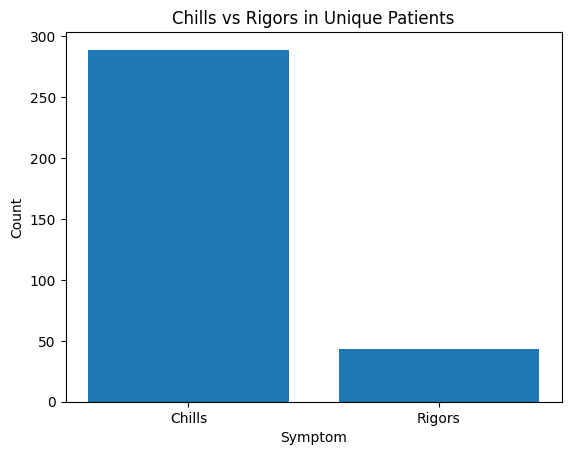

In [18]:
# Calculate counts of 'Chills' vs 'Rigors' for unique patients
unique_patients = FNHTR_symptoms_result.drop_duplicates(subset=['subject_id']).reset_index(drop=True)

# Initialize counters
chills_count = 0
rigors_count = 0

# Count occurrences of each symptom
for index, patient in unique_patients.iterrows():
    symptom = patient['symptom_mentioned']
    if symptom == 'Chills':
        chills_count += 1
    elif symptom == 'Rigors':
        rigors_count += 1

# Prepare data for histogram
symptom_counts = {'Chills': chills_count, 'Rigors': rigors_count}

# Plot histogram
import matplotlib.pyplot as plt

plt.bar(symptom_counts.keys(), symptom_counts.values())
plt.title('Chills vs Rigors in Unique Patients')
plt.xlabel('Symptom')
plt.ylabel('Count')
plt.show()


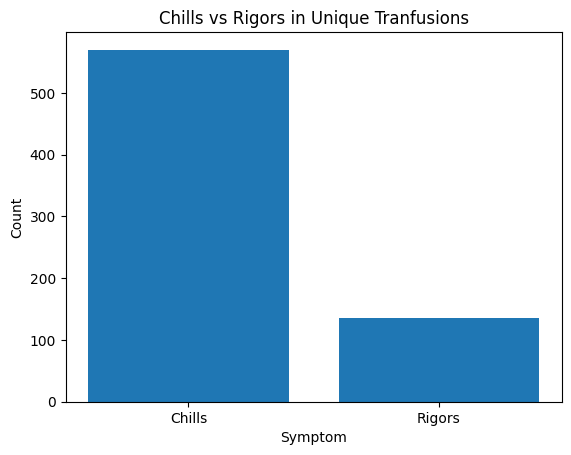

In [21]:
# Calculate counts of 'Chills' vs 'Rigors' for unique patients
unique_transfusions = FNHTR_symptoms_result.drop_duplicates(subset=['linkorderid']).reset_index(drop=True)

# Initialize counters
chills_count = 0
rigors_count = 0

# Count occurrences of each symptom
for index, patient in unique_transfusions.iterrows():
    symptom = patient['symptom_mentioned']
    if symptom == 'Chills':
        chills_count += 1
    elif symptom == 'Rigors':
        rigors_count += 1

# Prepare data for histogram
symptom_counts = {'Chills': chills_count, 'Rigors': rigors_count}

# Plot histogram
import matplotlib.pyplot as plt

plt.bar(symptom_counts.keys(), symptom_counts.values())
plt.title('Chills vs Rigors in Unique Tranfusions')
plt.xlabel('Symptom')
plt.ylabel('Count')
plt.show()


In [4]:
# get the types of items that can be administered to a patient

with open(f"{query_path}/FNHTR/total_transfusion.sql", 'r') as file:
    total_transfusion = file.read()

total_transfusion_result = client.query(total_transfusion).to_dataframe()
total_transfusion_result




/home/tyx1999120755/.pyenv/versions/3.12.7/envs/transfusion/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,total_transfusion_events
0,32818


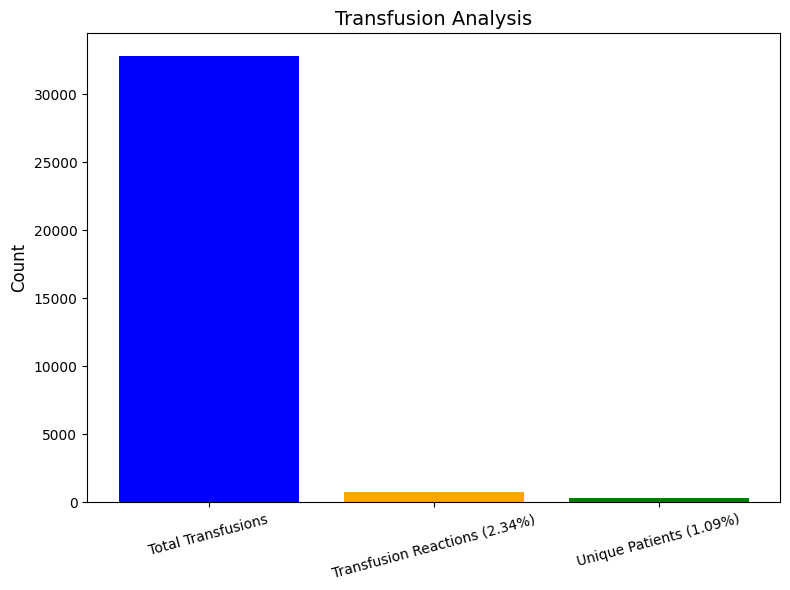

In [6]:
import matplotlib.pyplot as plt

# Data
categories = ["Total Transfusions", "Transfusion Reactions", "Unique Patients"]
values = [32818, 769, 357]

# Calculate percentages
reaction_percentage = (values[1] / values[0]) * 100  # Percentage of reactions
patient_percentage = (values[2] / values[0]) * 100  # Percentage of patients

# Format values with percentages
labels = [
    "Total Transfusions",
    f"Transfusion Reactions ({reaction_percentage:.2f}%)",
    f"Unique Patients ({patient_percentage:.2f}%)"
]

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['blue', 'orange', 'green'])
plt.title("Transfusion Analysis", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xticks(categories, labels, rotation=15, fontsize=10)
plt.tight_layout()
plt.show()
